In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename="C:\\Users\\birad\OneDrive\\Documents\\Heart_attack_Dataset_Kaggle_Notepad.csv"
df = pd.read_csv(filename)

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
def Outliner_info(quart_v):
    print("----------------for",quart_v,"-------------------")
    Q1,Q2,Q3 = df[quart_v].quantile([0.25,0.50,0.75]) 
    quartiles = [Q1,Q2,Q3]
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5*IQR
    upper_b = Q3 + 1.5*IQR
    print(["Q1","Q2  ","Q3 ","IQR","lower_b  ","upper_b"])
    print([Q1,Q2,Q3,IQR,lower_b,upper_b])
    #value lesser than lower_b and values greater than upper_b are considered as outliners
    lower_index = np.where(df[quart_v] <= lower_b)
    upper_index = np.where(df[quart_v] >= upper_b)
    print("index for lower outliners: ", lower_index)
    print("index for upper outliners: ",upper_index) 
    mean = df[quart_v].mean()
    print("mean of ",quart_v,"=",mean)
    val_list = []
    for val in df[quart_v]:
        if val >= upper_b:
            val_list.append(val)
    print("val_list = ",val_list)   

In [5]:
df1 = df.drop([85], axis = 0, inplace = False) 
df1.at[28,"chol"]= 369 
df1.at[96,"chol"]= 369 
df1.at[220,"chol"]= 369 
df1.at[246,"chol"]= 369

In [6]:
df1.drop([248,223], axis = 0, inplace = True)

In [7]:
temp_list = [  8, 101, 110, 152, 195, 203, 228, 241, 260, 266, 292]
for i in temp_list:
    df1.at[i,"trtbps"]=170

In [8]:
df1.at[272,"thalachh"] = 84

In [9]:
temp_list1 = [101, 204, 220, 221, 250, 291, 295]
for j in temp_list1:
    df1.at[j,"oldpeak"]= 4.0

In [10]:
temp_list2 = [ 92, 158, 163, 164, 251]
for k in temp_list2:
    df1.at[k,"caa"]= 3

In [11]:
df1.at[48,"thall"]=1
df1.at[281,"thall"]=1

In [12]:
df1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
duplicate_rows = df1[df1.duplicated()]
duplicate_rows

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,3,2,1


In [14]:
df1.duplicated().sum()
df1 = df1.drop_duplicates()

In [15]:
df1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


AdaBoost 

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [76]:
# Load the dataset

# Split the data into features and labels
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
# Define the AdaBoost model
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                         n_estimators=50,
                         random_state=42)

In [78]:
# Define the hyperparameters to search over
params = {'base_estimator__max_depth': [1, 2, 3],
          'learning_rate': [0.1, 0.5, 1.0]}

# Perform grid search with cross-validation
grid = GridSearchCV(estimator=ada,
                    param_grid=params,
                    cv=10,
                    scoring='accuracy',
                    n_jobs=-1)

# Fit the grid search object to the data
grid.fit(X_train, y_train)

# Print the best hyperparameters
print(grid.best_params_)


{'base_estimator__max_depth': 1, 'learning_rate': 0.1}


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fit the model with the best hyperparameters
best_ada = grid.best_estimator_
best_ada.fit(X_train, y_train)

y_pred = best_ada.predict(X)
y_true = y


# Evaluation
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
y_pred = best_ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 score: {f1:.4f}")
print(f"Cross-validation mean: {cv_mean:.4f}")
print(f"Cross-validation standard deviation: {cv_std:.4f}")

print("-----Accuracy-----")
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 0.9667
Precision: 0.8087
Recall: 0.5706
F1 score: 0.6691
Cross-validation mean: 0.8293
Cross-validation standard deviation: 0.0409
-----Accuracy-----
Accuracy: 96.67%


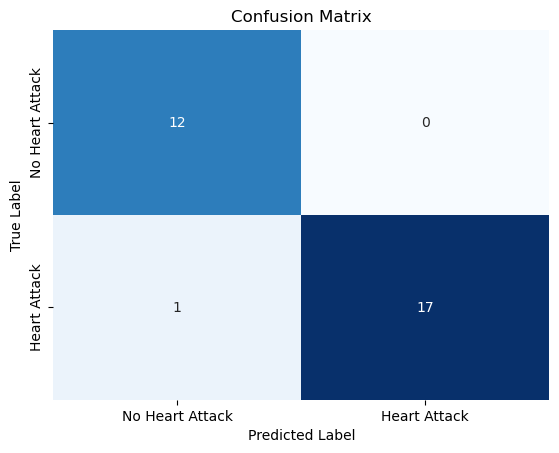

In [80]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data into X_test and y_test
# Assuming your Gradient Boosting model is named 'best_gb'

# Get the predictions for the test data
y_pred = best_ada.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False,
            xticklabels=['No Heart Attack', 'Heart Attack'],
            yticklabels=['No Heart Attack', 'Heart Attack'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

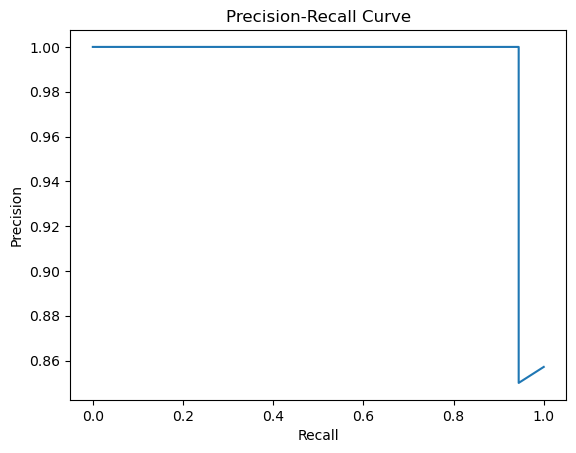

In [81]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the predicted probabilities for the test data
y_proba = best_ada.predict_proba(X_test)[:,1]

# Calculate the precision-recall curve values
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

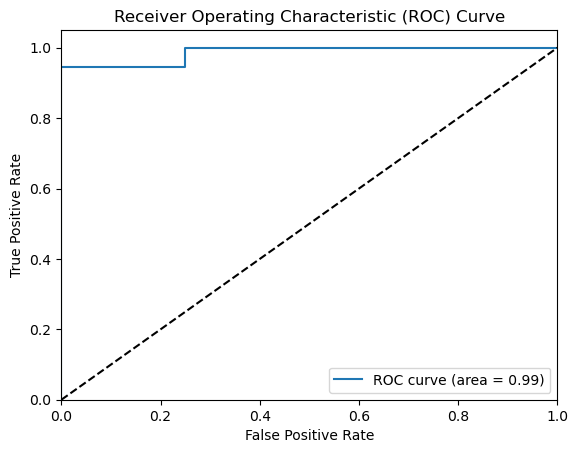

In [82]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load your data into X_test and y_test
# Assuming your Gradient Boosting model is named 'best_gb'

# Get the predicted probabilities for the test data
y_proba = best_ada.predict_proba(X_test)[:,1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

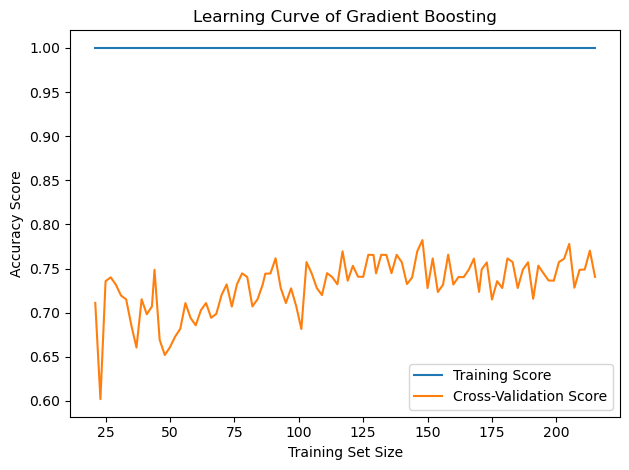

In [85]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(ada,X_train, y_train, cv=10, scoring="accuracy",n_jobs=-1, train_sizes=np.linspace(0.1,1.0,100))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-Validation Score")
plt.title("Learning Curve of AdaBoo")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout() 
plt.show()